In [1]:
import numpy as np
import matplotlib.pyplot as plt
from parton import mkPDF, PLumi
import lhapdf
import os
from wums import plot_tools

In [2]:
lhapdf.pathsAppend("/home/submit/kdlong/work/WRemnants/test_grids/")

In [27]:
#nnpdf40 = mkPDF('NNPDF40_nnlo_hessian_pdfas', 0, pdfdir=os.environ["LHAPDF_DATA_PATH"].split(":")[0])
#cmsmw_nnpdf40 = mkPDF('NNPDF40_nnlo_hessian_pdfas_cmsmw', 0, pdfdir="/home/submit/kdlong/mc2hessian/NNPDF40_nnlo_hessian_pdfas_cmsmw/")

In [4]:
mw = 80.360

In [3]:
pdf_set = lhapdf.getPDFSet("NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled")
members = pdf_set.mkPDFs()

LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled
NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled, version 1; 51 PDF members


In [5]:
def eval_pdf(pdf, flav, x, q):
    if type(flav) == int:
        return pdf.xfxQ(flav, x, q)
    elif flav=='uv':
        return pdf.xfxQ(2,x,q)-pdf.xfxQ(-2,x,q)
    elif flav=='dv':
        return pdf.xfxQ(1,x,q)-pdf.xfxQ(-1,x,q)
    elif flav=='rs':
        return (pdf.xfxQ(3,x,q)+pdf.xfxQ(-3,x,q))/(pdf.xfxQ(-1,x,q)+pdf.xfxQ(-2,x,q))
    else:
        raise NotImplementedError("Flavor type {flav} is unsupported")

In [6]:
flavor_names = {
    "uv" : "u_{V}",
    1 : "d",
    -1 : "\bar{d}",
    2 : "u",
    -2 : "\bar{u}",
    3 : "s",
    -3 : "\bar{s}",
    "dv" : "d_{v}",
    "rs" : "r_{s}",
}

In [7]:
def get_pdf_data(pdf_name, flavor, Q, x_range):
    pdf_set = lhapdf.getPDFSet(pdf_name)
    members = pdf_set.mkPDFs()
    # Calculate values for all members (exclude alpha_s)
    all_vals = np.array([[eval_pdf(m, flavor, x, Q) for x in x_range] for m in members[:-2]])
    central = all_vals[0]
    # Hessian uncertainty
    delta_f = np.sqrt(np.sum((all_vals[1:] - central)**2, axis=0))
    return central, delta_f

In [8]:
def make_pdf_plot(flavor, Q_scale, pdf_sets, labels, colors):
    # --- Setup Plot ---
    x_range = np.logspace(-4, -0.01, 200)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True, 
                                   gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})
    
    reference_central = None
    
    for i, name in enumerate(pdf_sets):
        central, err = get_pdf_data(name, flavor, Q_scale, x_range)
        
        # Store the first set as reference for the ratio
        if i == 0:
            reference_central = central
        
        # 1. Main Plot (Top Panel)
        ax1.plot(x_range, central, color=colors[i], label=labels[i])
        ax1.fill_between(x_range, central - err, central + err, color=colors[i], alpha=0.2)
        
        # 2. Ratio Plot (Bottom Panel)
        ratio_central = central / reference_central
        ratio_err = err / reference_central
        
        ax2.plot(x_range, ratio_central, color=colors[i])
        ax2.fill_between(x_range, ratio_central - ratio_err, ratio_central + ratio_err, 
                         color=colors[i], alpha=0.2)
    
    # Formatting Top Panel
    ax1.set_ylabel(f'$x {flavor_names[flavor]}(x, Q^2)$', fontsize=16)
    ax1.set_title(f'PDF at $Q = {Q_scale}$ GeV', fontsize=14)
    ax1.legend(loc="upper left")
    ax1.grid(True, which="both", alpha=0.3)
    
    # Formatting Ratio Panel
    ax2.axhline(1.0, color='black', lw=1, ls='--') # Reference line
    ax2.set_ylabel('Ratio to central', fontsize=14)
    ax2.set_xlabel(r'$x$', fontsize=12)
    ax2.set_xscale('log')
    ax2.set_ylim(0.8, 1.2) # Typically +/- 20% for ratio plots
    ax2.grid(True, which="both", alpha=0.3)
    
    plt.show()

LHAPDF 6.5.4 loading all 53 PDFs in set NNPDF40_nnlo_hessian_pdfas
NNPDF40_nnlo_hessian_pdfas, version 1; 53 PDF members
LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled
NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled, version 1; 51 PDF members
LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_uncx4p0
NNPDF40_nnlo_hessian_pdfas_cmsmw_uncx4p0, version 1; 51 PDF members


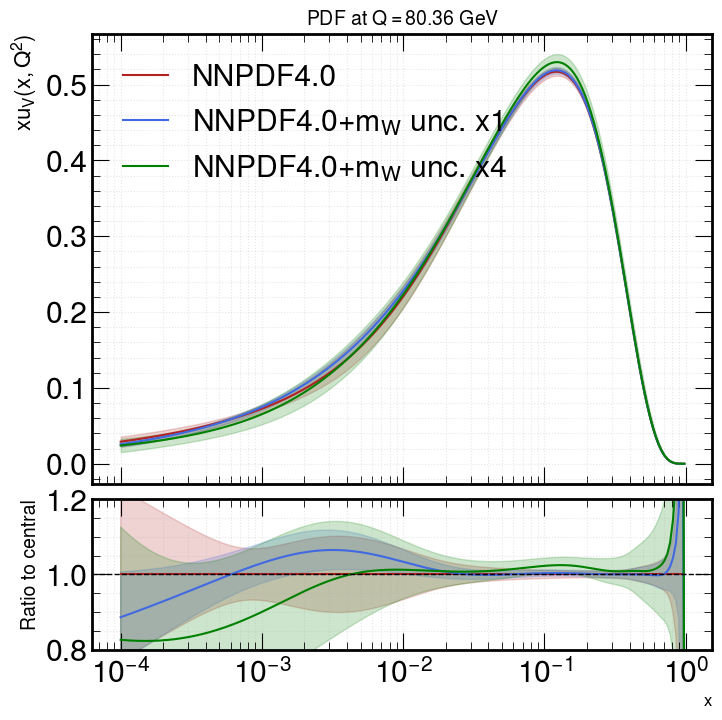

In [9]:
# --- Configuration ---
Q_scale = mw
flavor = "uv"
pdf_sets = ["NNPDF40_nnlo_hessian_pdfas", 
            "NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled",
           "NNPDF40_nnlo_hessian_pdfas_cmsmw_uncx4p0"
           ]
labels = ["NNPDF4.0", "NNPDF4.0+$m_{W}$ unc. x1", "NNPDF4.0+$m_{W}$ unc. x4"]
colors = ['firebrick', 'royalblue', "green"]

make_pdf_plot(flavor, Q_scale, pdf_sets, labels, colors)

LHAPDF 6.5.4 loading all 53 PDFs in set NNPDF40_nnlo_hessian_pdfas
NNPDF40_nnlo_hessian_pdfas, version 1; 53 PDF members
LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled
NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled, version 1; 51 PDF members
LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_uncx4p0
NNPDF40_nnlo_hessian_pdfas_cmsmw_uncx4p0, version 1; 51 PDF members


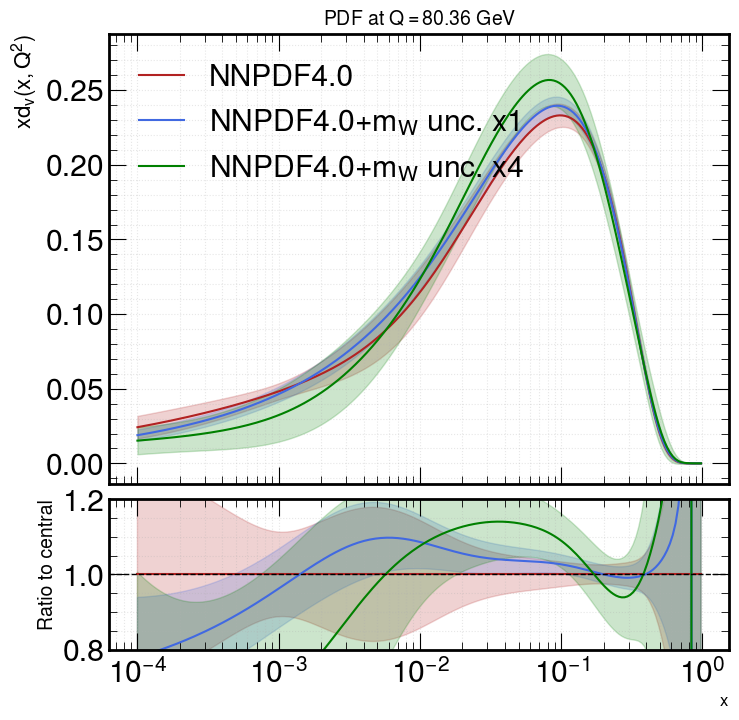

In [12]:
# --- Configuration ---
flavor = "dv"
make_pdf_plot(flavor, Q_scale, pdf_sets, labels, colors)

LHAPDF 6.5.4 loading all 53 PDFs in set NNPDF40_nnlo_hessian_pdfas
NNPDF40_nnlo_hessian_pdfas, version 1; 53 PDF members
LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled
NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled, version 1; 51 PDF members
LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_uncx4p0
NNPDF40_nnlo_hessian_pdfas_cmsmw_uncx4p0, version 1; 51 PDF members


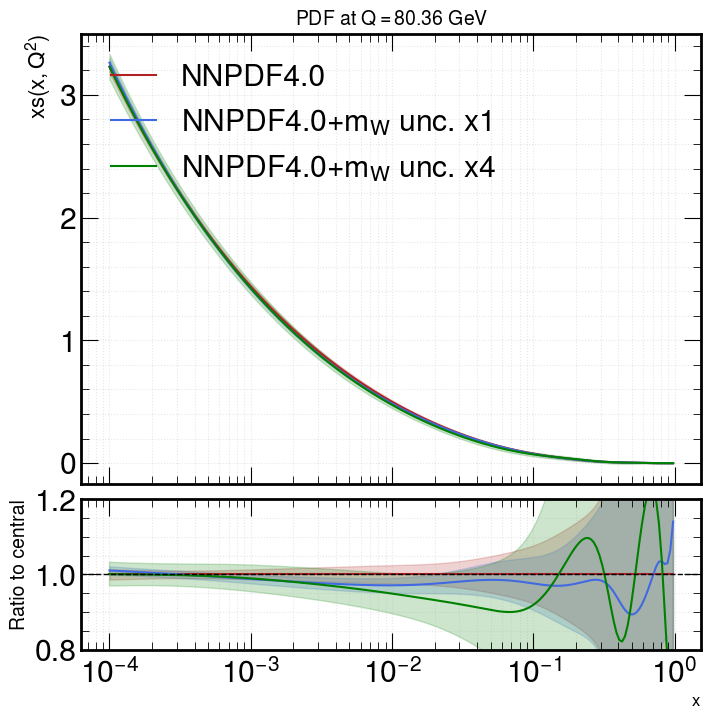

In [10]:
# --- Configuration ---
flavor = 3
make_pdf_plot(flavor, Q_scale, pdf_sets, labels, colors)

LHAPDF 6.5.4 loading all 53 PDFs in set NNPDF40_nnlo_hessian_pdfas
NNPDF40_nnlo_hessian_pdfas, version 1; 53 PDF members
LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled
NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled, version 1; 51 PDF members
LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_uncx4p0
NNPDF40_nnlo_hessian_pdfas_cmsmw_uncx4p0, version 1; 51 PDF members


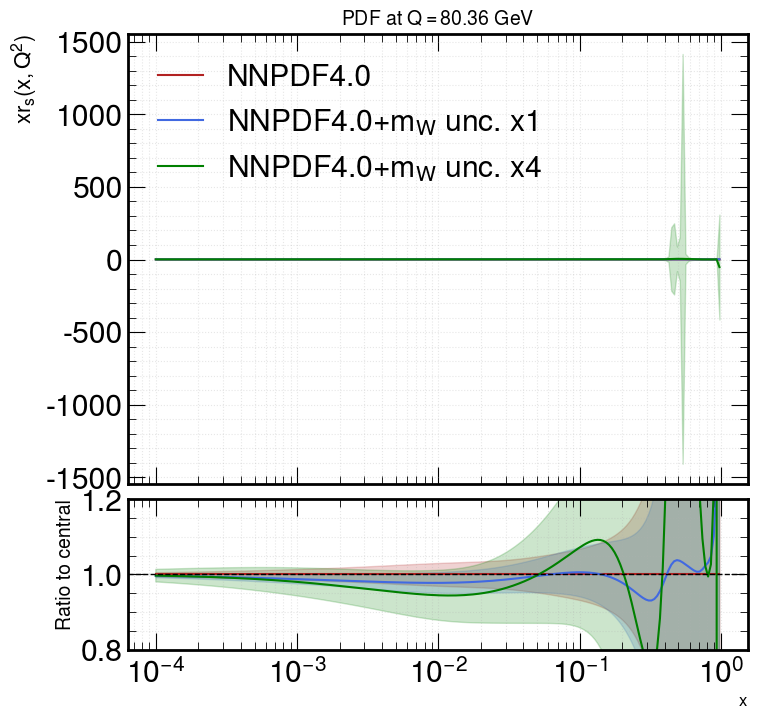

In [11]:
flavor = "rs"
make_pdf_plot(flavor, Q_scale, pdf_sets, labels, colors)

LHAPDF 6.5.4 loading all 59 PDFs in set CT18ZNNLO
CT18ZNNLO, version 1; 59 PDF members
LHAPDF 6.5.4 loading all 59 PDFs in set CT18ZNNLO_cmsmw_unscaled
CT18ZNNLO_cmsmw_unscaled, version 1; 59 PDF members


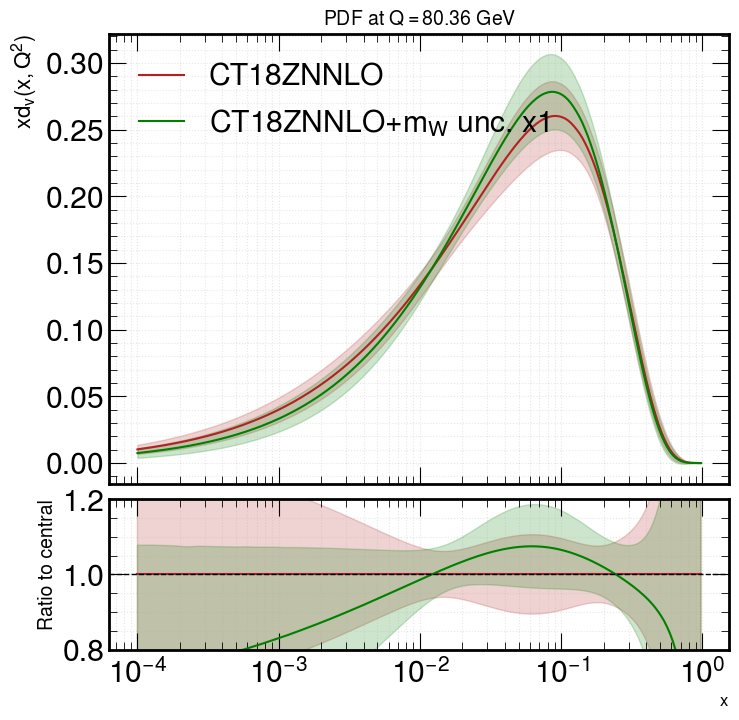

In [13]:
pdf_sets = ["CT18ZNNLO", 
            "CT18ZNNLO_cmsmw_unscaled",
           ]
labels = ["CT18ZNNLO", "CT18ZNNLO+$m_{W}$ unc. x1"]
colors = ['firebrick', "green"]
flavor = "dv"
make_pdf_plot(flavor, Q_scale, pdf_sets, labels, colors)

LHAPDF 6.5.4 loading all 51 PDFs in set NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled
NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled, version 1; 51 PDF members
LHAPDF 6.5.4 loading all 59 PDFs in set CT18ZNNLO_cmsmw_unscaled
CT18ZNNLO_cmsmw_unscaled, version 1; 59 PDF members


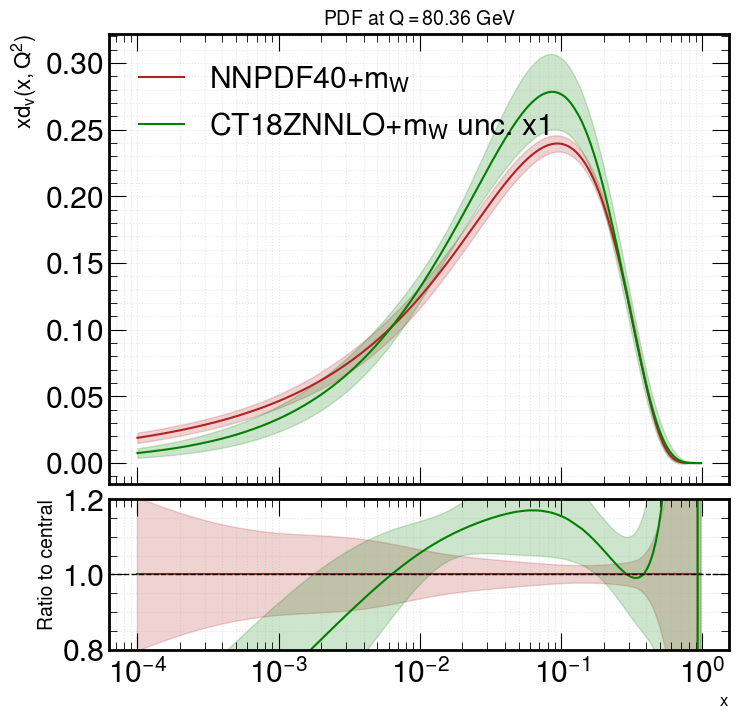

In [14]:
pdf_sets = ["NNPDF40_nnlo_hessian_pdfas_cmsmw_unscaled", 
            "CT18ZNNLO_cmsmw_unscaled",
           ]
labels = ["NNPDF40+$m_{W}$", "CT18ZNNLO+$m_{W}$ unc. x1"]
colors = ['firebrick', "green"]
flavor = "dv"
make_pdf_plot(flavor, Q_scale, pdf_sets, labels, colors)

LHAPDF 6.5.4 loading all 53 PDFs in set NNPDF40_nnlo_hessian_pdfas
NNPDF40_nnlo_hessian_pdfas, version 1; 53 PDF members
LHAPDF 6.5.4 loading all 59 PDFs in set CT18ZNNLO
CT18ZNNLO, version 1; 59 PDF members


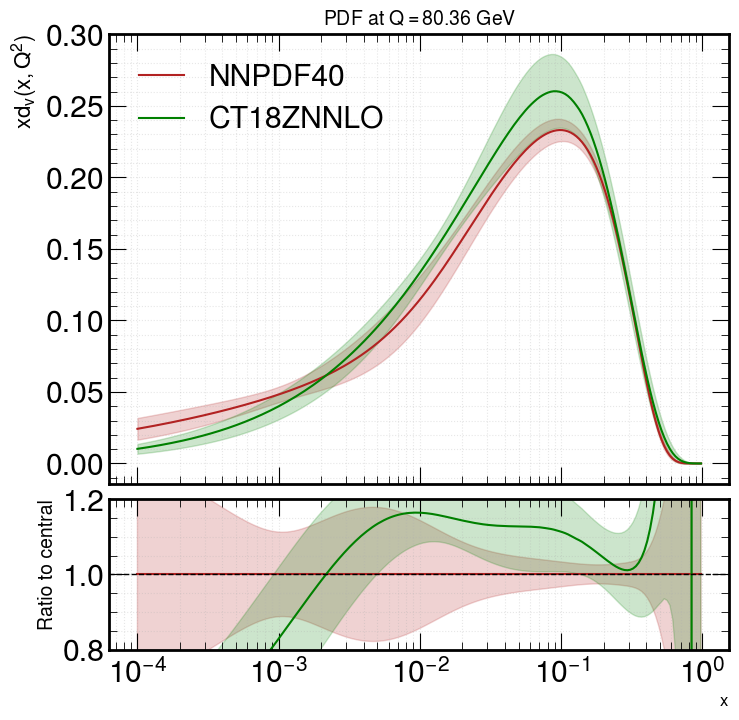

In [15]:
pdf_sets = ["NNPDF40_nnlo_hessian_pdfas", 
            "CT18ZNNLO",
           ]
labels = ["NNPDF40", "CT18ZNNLO"]
colors = ['firebrick', "green"]
flavor = "dv"
make_pdf_plot(flavor, Q_scale, pdf_sets, labels, colors)